In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the dataset

In [146]:
df = pd.read_csv('./Downloads/datasets/advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [10]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


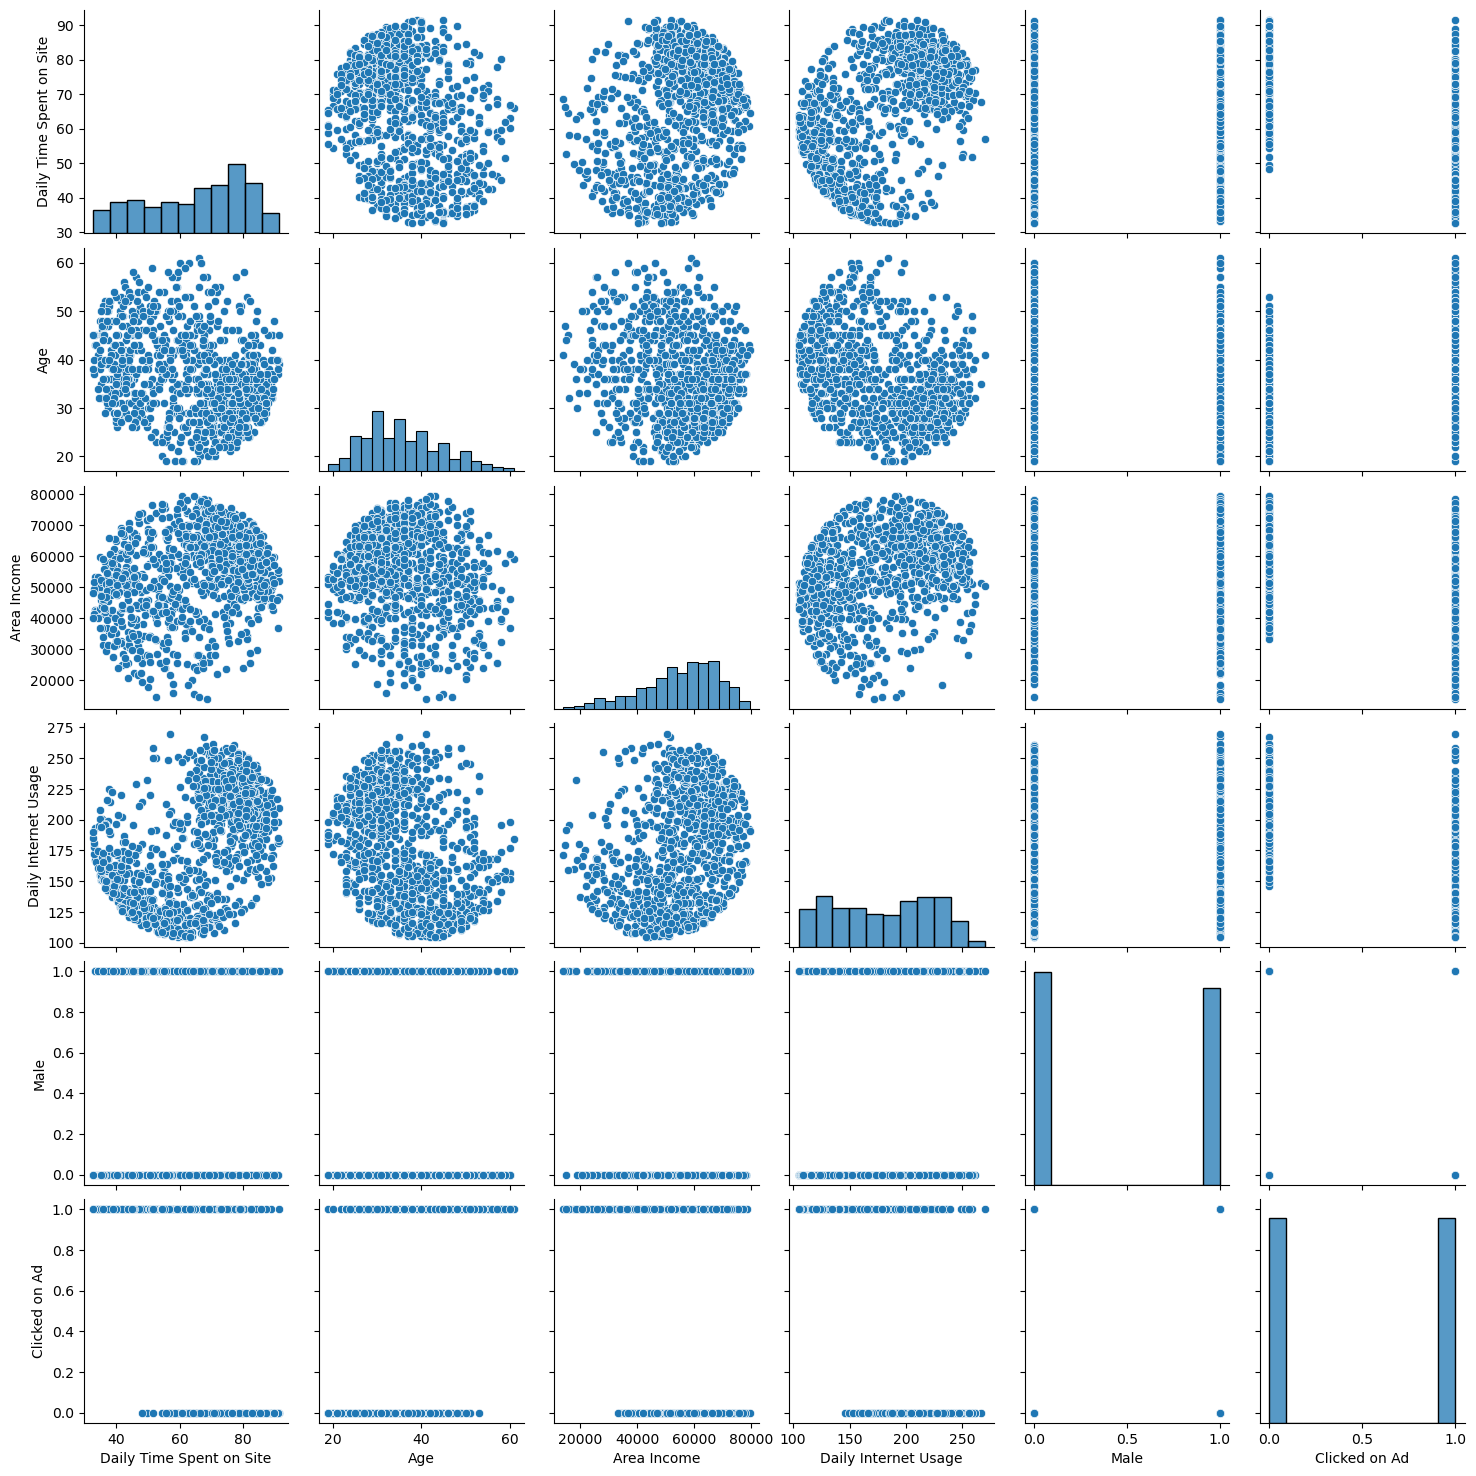

In [11]:
sns.pairplot(data=df)

In [18]:
matrix = df.corr()

C:\Users\noorr\AppData\Local\Temp\ipykernel_12164\1464157473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


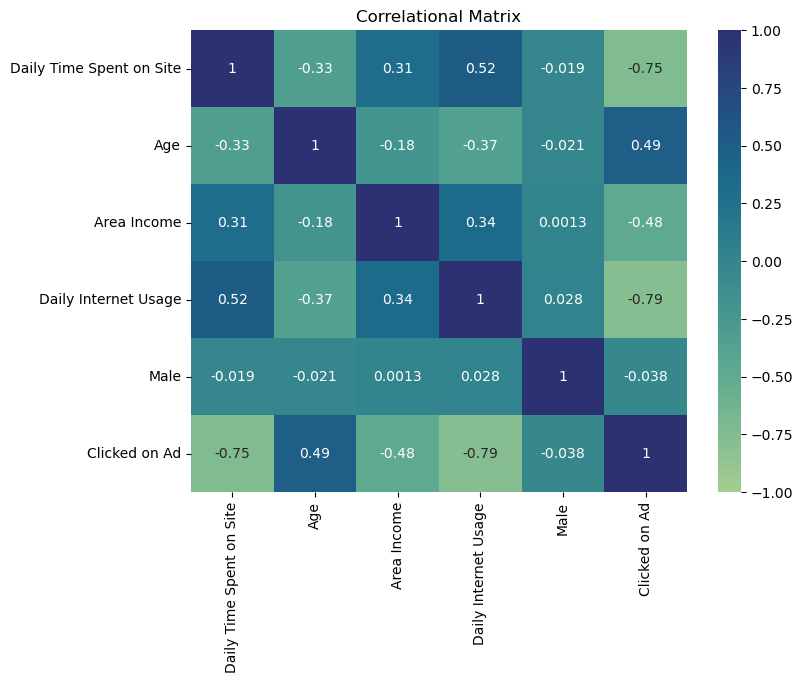

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot= True , cmap ='crest', vmin=-1, vmax=1 )
plt.title('Correlational Matrix')
plt.show()

### Note : 
#### 1. From the correlation matrix we can see a  strong negative relationship between Daily Time Spent on Site, Daily Internet Usage and Clicked on Ads. Which indicates that people who spend less time on the internet are less likely to click on ads. 
#### 2. There is a somewhat strong positive relation between Daily Time Spent on Site and Daily Internet Usage which  means that a good amount of people who spend a substantial amount of internet spend a decent amount of time on the site
#### 3. From the pairplot no outliers can be seen

# Looking into the quality of the Data

In [22]:
df.loc[df.duplicated()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


### Note: Seems like there's no duplicated data



In [24]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Note: No null value

## Changing column name 'Male' into 'Gender' where 0 will indicate Female and 1 indicate Male

In [41]:
df.rename(columns ={'Male':'Gender'} , inplace = True)

## Understanding the relevancy of Ad Topic Line in the dataset

### Checking how many unique topics are there

In [25]:
df['Ad Topic Line'].nunique()

1000

### Note : All of the topics are unique from each other which means that this feature may not provide any meaningful information

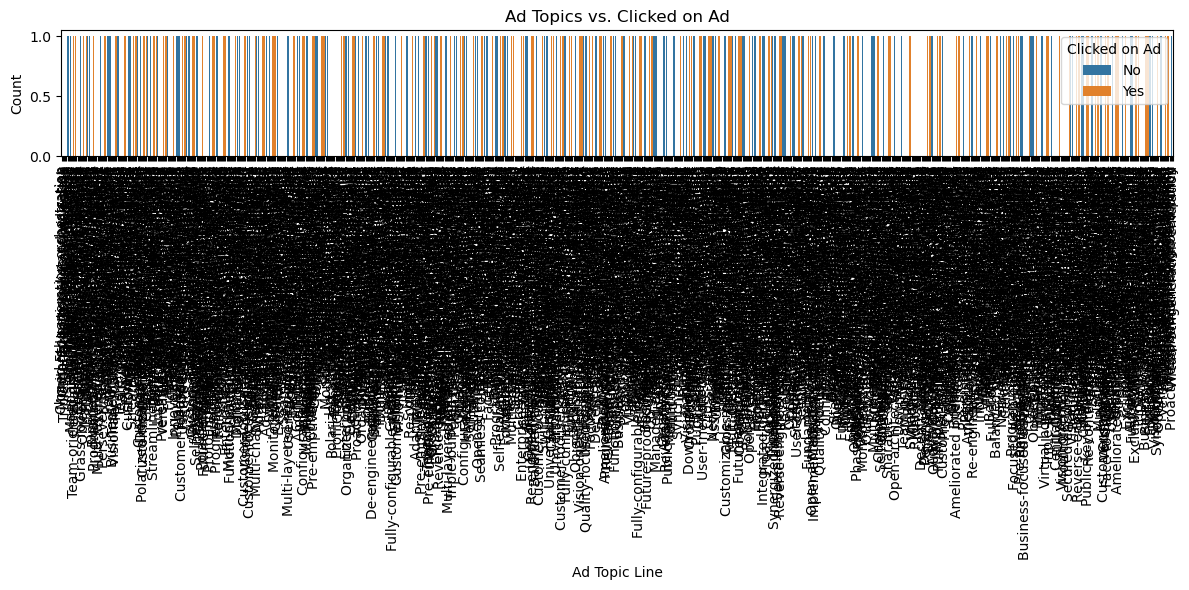

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Ad Topic Line', hue='Clicked on Ad')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Ad Topic Line')
plt.ylabel('Count')
plt.title('Ad Topics vs. Clicked on Ad')
plt.legend(title='Clicked on Ad', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()

### Note : No pattern can be seen between the topics and clicks on the ads

### Checking if the length of the topic impacts anything

In [147]:
df['Ad Topic Length'] = df['Ad Topic Line'].apply(len)

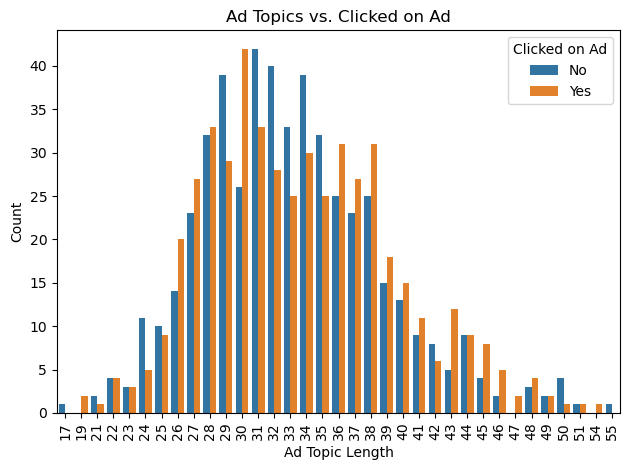

In [28]:
sns.countplot(data=df, x='Ad Topic Length', hue='Clicked on Ad')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Ad Topic Length')
plt.ylabel('Count')
plt.title('Ad Topics vs. Clicked on Ad')
plt.legend(title='Clicked on Ad', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()

### Note: The length of these topic lines also don't provide any information/pattern

## Hence, it's better to drop the 'Ad Topic Line'  column to prevent the dataset from high dimensionality

In [148]:
df.drop(columns = ['Ad Topic Line' , 'Ad Topic Length'], inplace = True)

In [42]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Seeing if there's any relation between gender and clicks on ad as it was difficult to extract  a pattern from the pair plot above(as all the data points are supposed to be 0 or 1, it was stacked on top of each other)

In [46]:
clicked_on_ad = df[df['Clicked on Ad']==1]
didnt_click = df[df['Clicked on Ad'] == 0]
print(clicked_on_ad['Gender'].value_counts())
print(didnt_click['Gender'].value_counts())    
    

0    269
1    231
Name: Gender, dtype: int64
0    250
1    250
Name: Gender, dtype: int64


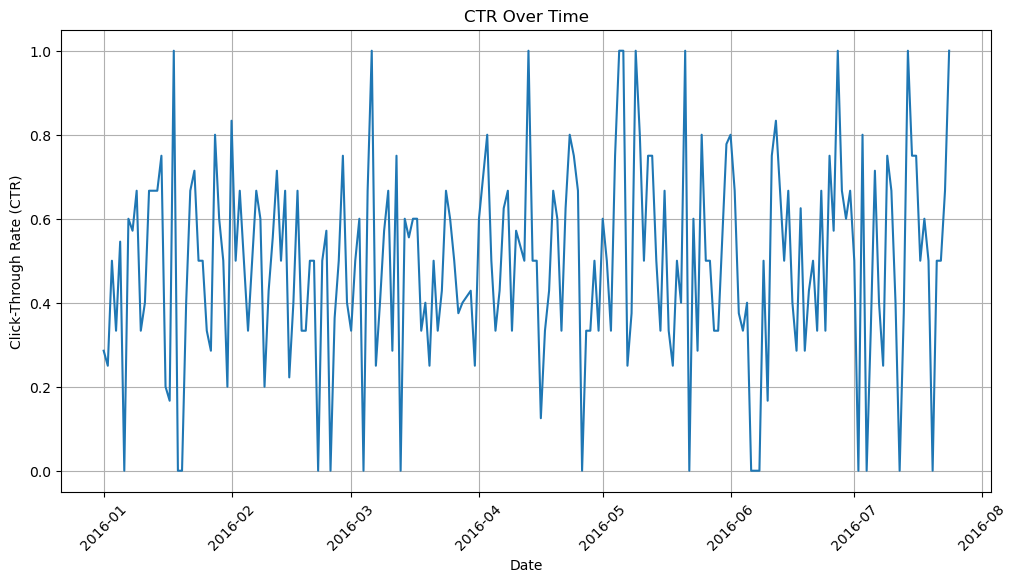

In [141]:
# Calculate the click-through rate (CTR) over time
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
ctr_by_date = df.groupby('Date')['Clicked on Ad'].mean()

# Plot CTR over time
plt.figure(figsize=(12, 6))
plt.plot(ctr_by_date.index, ctr_by_date.values)
plt.xlabel('Date')
plt.ylabel('Click-Through Rate (CTR)')
plt.title('CTR Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [149]:
df.drop(columns = ['Timestamp'] , inplace=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0


### Note: No significant difference 

# Data Training, Processing and Prediction

In [160]:
y = df.iloc[:,-1:]
x = df.iloc[:, :-1]

### Encoding Categorcal Values

In [161]:
columns_to_encode = ['City','Country']

In [162]:
one_hot_data=pd.get_dummies(df[['City','Country']])
one_hot_data

,City_Adamsbury,City_Adamside,City_Adamsstad,City_Alanview,City_Alexanderfurt,City_Alexanderview,City_Alexandrafort,City_Alexisland,City_Aliciatown,City_Alvaradoport,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
x_final = pd.concat([x.drop(columns=columns_to_encode), one_hot_data], axis=1)


In [164]:
x_final

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,City_Adamsbury,City_Adamside,City_Adamsstad,City_Alanview,City_Alexanderfurt,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train , x_test ,  y_train , y_test = train_test_split(x_final,y,test_size = 0.2, random_state=42)


In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\noorr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [169]:
lr.score(x_test,y_test)

0.92

###  Note: Prediction rate is good (0.92)

## Predicting whether a 35-year-old female residing in New York, USA, who spends 60.0 minutes daily on the site, uses the internet for 250.0 minutes daily, and has an area income of 60000.0, will click on the ad or not.

In [177]:
# New data for prediction (replace this with your actual data)
new_data = pd.DataFrame({
    'Daily Time Spent on Site': [60.0],
    'Age': [35],
    'Area Income': [60000.0],
    'Daily Internet Usage': [250.0],
    'City_New York': [1],  # One-hot encoded city
    'Gender': [0],
    'Country_USA': [1],  # One-hot encoded country
})
# Store the one-hot encoding mapping used during training

encoding_mapping = pd.get_dummies(x_train).columns.tolist()

new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=encoding_mapping, fill_value=0)

# Now new_data_encoded has the same columns as the training data

# Use the model to make predictions on the new data
predictions = lr.predict(new_data_encoded)

# The 'predictions' variable now contains the predicted classes (0 or 1) for the new data points
print(predictions)

[0]


## Result: She won't click on the ad